# Support Vector Machine on Breast Cancer dataset
SVM :

A program to implement SVM classifier on UCI breast cancer dataset to perform the classification task.  The dataset is split into 70:30 as train and test dataset. 

       
a. svm_models() : to implement SVM models with different kernels and bar plot the test accuracy.

b. ploy_kernel_var_deg() : to implement SVM with polynomial kernel and plot the execution time w.r.t. the degree of the polynomial ranging from 1 to 3.

c. custom_kernel() : to implement a custom kernel which is of the form K(X,Y)= k*XYT+θ, where k and θ, are constants.

d. svm_custom_kernel() : to implement SVM classifier with the above defined custom kernel and report the test accuracy.  

## Importing Libraries

In [0]:
##################################################
## Basic imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
from sklearn.preprocessing import PolynomialFeatures
###################################################

## Loading data

In [0]:
###################################################
## the method loads breast cancer dataset and returns
## the dataset and label as X,Y
def load_data(): 
	data_set = datasets.load_breast_cancer()
	X=data_set.data
	y=data_set.target
	return X,y
###################################################

## SVM Classifier

In [0]:
###################################################
## this method takes train and test data and different 
## svm models and fit the train data into svm models and 
## do bar plot using sns.barplot() of different svm model 
## accuracy. You need to implement the model fitting and 
## bar plotting in this method.
def svm_models(X_train, X_test, y_train, y_test,models):
    accuracy=[]
    models_list=[]
    for i in range(0,len(models)):
        clf=models[i].fit(X_train,y_train)
        accuracy.append(round(clf.score(X_test,y_test),ndigits=3))
        models_list.append(str(models[i].kernel))    
    plt.bar(models_list,accuracy, align='center', alpha=0.5)
    plt.xticks(models_list)
    plt.ylabel('Accuracy')
    plt.title('Accuracy of SVM with different kernels')
    for index,data in enumerate(accuracy):
        plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=8))
    plt.show()
    pass
###################################################

### Poly Kernel

In [0]:
###################################################
## this method fits the dataset to a svm model with 
## polynomial kernel with degree varies from 1 to 3 
## and plots the execution time wrt. degree of 
## polynomial, you can calculate the elapsed time 
## by time.time() method
def ploy_kernel_var_deg(X_train, X_test, y_train, y_test):
    ex_time=[]
    degree_arr=[]
    for degree in range(1,4):
        start_time = time.time()
        clf=svm.SVC(kernel='poly', degree = degree, gamma=1, coef0=1)
        clf.fit(X_train,y_train)
        ex_time.append(round(time.time()-start_time,ndigits=5))
        degree_arr.append(degree)
    ex_time=np.array(ex_time)
    degree_arr=np.array(degree_arr)
    plt.plot(degree_arr,ex_time)
    plt.xticks(degree_arr)
    plt.xlabel('Degree')
    plt.ylabel('Time')
    plt.title('Execution time for Polynomial kernels')
    for index,data in enumerate(ex_time):
        plt.text(x=index+1 , y =data -0.0007 , s=f"{data}" , fontdict=dict(fontsize=10))
    plt.show()
    pass
###################################################

### Custom Kernel

In [0]:
###################################################
## this method implements a custom kernel technique 
## which is K(X,Y)=k*XY'+theta where k and theta are
## constants. Since SVC supports custom kernel function
## with only 2 parameters we return the custom kernel 
## function name from another method which takes k and
## theta as input
def custom_kernel(k,theta):
    
    def my_kernel(X, Y):
        retval = (k*(np.dot(X,Y.T))+theta)
        return retval 
        pass
    return my_kernel
    pass
####################################################





####################################################
## this method uses the custom kernel and fit the 
## training data and reports accuracy on test data
def svm_custom_kernel(X_train, X_test, y_train, y_test, model):
    acc=[]
    clf=model.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
    return(print("Test accuracy for custom kernel:",acc)) 
    pass
####################################################

## Training and Testing

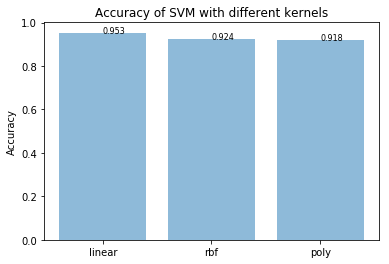

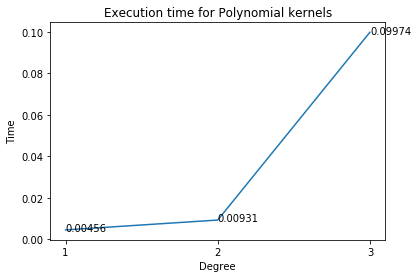

Test accuracy for custom kernel: [0.9473684210526315]


In [6]:
####################################################
## main method:
def main():
    X,y=load_data()
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test
    
    train_mean=np.mean(X_train)
    train_std=np.std(X_train)
    test_mean=np.mean(X_test)
    test_std=np.std(X_test)
    X_train_norm=((X_train-train_mean)/train_std)
    X_test_norm=((X_test-test_mean)/train_std)
    C=1
    models = (svm.SVC(kernel='linear', C=C),
          	svm.SVC(kernel='rbf', gamma='auto', C=C),
          	svm.SVC(kernel='poly', degree=2, gamma='auto', C=C))

    svm_models(X_train_norm, X_test_norm, y_train, y_test,models)
    
    
    ploy_kernel_var_deg(X_train_norm, X_test_norm, y_train, y_test)
    
    k=0.1
    theta=0.1

    model=svm.SVC(kernel=custom_kernel(k,theta))
    svm_custom_kernel(X_train_norm, X_test_norm, y_train, y_test, model)
#####################################################	


if __name__=='__main__':
	main()

# 